### Numpy часть

#### Выполняется с помощью numpy и базовой функциональности python

In [5]:
import pandas as pd
import numpy as np

In [6]:
iris_df = pd.read_csv("iris_dataset.csv")

iris_df.head()


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [20]:

X = iris_df.iloc[:, :4].to_numpy()
y = iris_df.iloc[:, 4].to_numpy()

print(f"Матрица X: {X.nbytes} байт")
print(f"Вектор y: {y.nbytes} байт")


Матрица X: 4768 байт
Вектор y: 1192 байт


##### занимает Матрица X: 4768 байт, Вектор y: 1192 байт

##### Нормализуйте данные на промежуток от 0 до 1 для каждой колонки

In [21]:
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_norm[:10]


array([[0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667]])

##### Представьте один из признаков в виде категориальной переменной и её на три типа используя квантили:


In [25]:

feature = X_norm[:, 0] 

q25, q75 = np.quantile(feature, [0.25, 0.75])

categories = np.empty_like(feature, dtype=object)
categories[feature < q25] = 'small'
categories[(feature >= q25) & (feature <= q75)] = 'medium'
categories[feature > q75] = 'big'

categories


array(['small', 'small', 'small', 'small', 'medium', 'small', 'small',
       'small', 'small', 'medium', 'small', 'small', 'small', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'small', 'medium', 'small', 'small', 'small', 'medium',
       'medium', 'small', 'small', 'medium', 'medium', 'medium', 'small',
       'small', 'medium', 'small', 'small', 'medium', 'small', 'small',
       'small', 'small', 'medium', 'small', 'medium', 'small', 'medium',
       'small', 'big', 'medium', 'big', 'medium', 'big', 'medium',
       'medium', 'small', 'big', 'medium', 'small', 'medium', 'medium',
       'medium', 'medium', 'big', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'big', 'big',
       'big', 'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'big', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'small', 'medium', 'medium', 'medium',


##### Разделение датасета на две случайные выборки (0.8 / 0.2)

In [58]:
sample_idx = np.random.choice(len(X), size=len(X), replace=False)
train_samples = int(0.8 * len(X))

X_train = X_norm[sample_idx[:train_samples]]
X_test = X_norm[sample_idx[train_samples:]]
y_train = y[sample_idx[:train_samples]]
y_test = y[sample_idx[train_samples:]]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((119, 4), (30, 4), (119,), (30,))

### Выполняется с помощью пакетов sklearn и numpy

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

##### Выберите один из методов классификации (к примеру, SVC), обучите на тренировочном датасете, оцените результат на тестовом и сделайте выводы

In [60]:
svc_basic = SVC(kernel='linear', random_state=42)
svc_basic.fit(X_train, y_train)
y_pred_basic = svc_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, y_pred_basic)
accuracy_basic

0.9666666666666667

##### Точность модели составляет 96,7% это показывает, что модель хорошо обучается на тестовых данных

##### Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), сделайте выводы

##### эксперимент 1: Полиномиальное ядро разной степени

In [63]:
model_poly2 = SVC(kernel='poly', degree=2, random_state=42)
model_poly2.fit(X_train, y_train)
y_pred_poly2 = model_poly2.predict(X_test)
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)

model_poly4 = SVC(kernel='poly', degree=4, random_state=42)
model_poly4.fit(X_train, y_train)
y_pred_poly4 = model_poly4.predict(X_test)
accuracy_poly4 = accuracy_score(y_test, y_pred_poly4)

accuracy_basic, accuracy_poly2, accuracy_poly4

(0.9666666666666667, 1.0, 0.9666666666666667)

#####  для классификации Iris лучше всего подходит полиномиальное ядро второй степени

##### Эксперимент 2: Разные значения gamma для RBF

In [64]:
model_gamma_low = SVC(kernel='rbf', gamma=0.1, random_state=42)
model_gamma_low.fit(X_train, y_train)
y_pred_gamma_low = model_gamma_low.predict(X_test)
accuracy_gamma_low = accuracy_score(y_test, y_pred_gamma_low)

model_gamma_high = SVC(kernel='rbf', gamma=1.0, random_state=42)
model_gamma_high.fit(X_train, y_train)
y_pred_gamma_high = model_gamma_high.predict(X_test)
accuracy_gamma_high = accuracy_score(y_test, y_pred_gamma_high)

accuracy_basic,accuracy_gamma_low, accuracy_gamma_high

(0.9666666666666667, 0.9, 0.9666666666666667)

##### параметр gamma значительно влияет на качество RBF ядра: слишком маленькое значение приводит к недообучению (90%), а оптимальное значение показывает такую же  точность как линейное ядро

##### Эксперимент 3: Ядро sigmoid

In [65]:
model_sigmoid = SVC(kernel='sigmoid', random_state=42)
model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_sigmoid

0.43333333333333335

##### sigmoid ядро показало низкую точность- доказывает его неэффективность для данного датасета по сравнению с линейным и полиномиальным ядрами

##### Пользуясь методами уменьшения размерности (PCA, t-sne) визуализируйте датасет. 

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

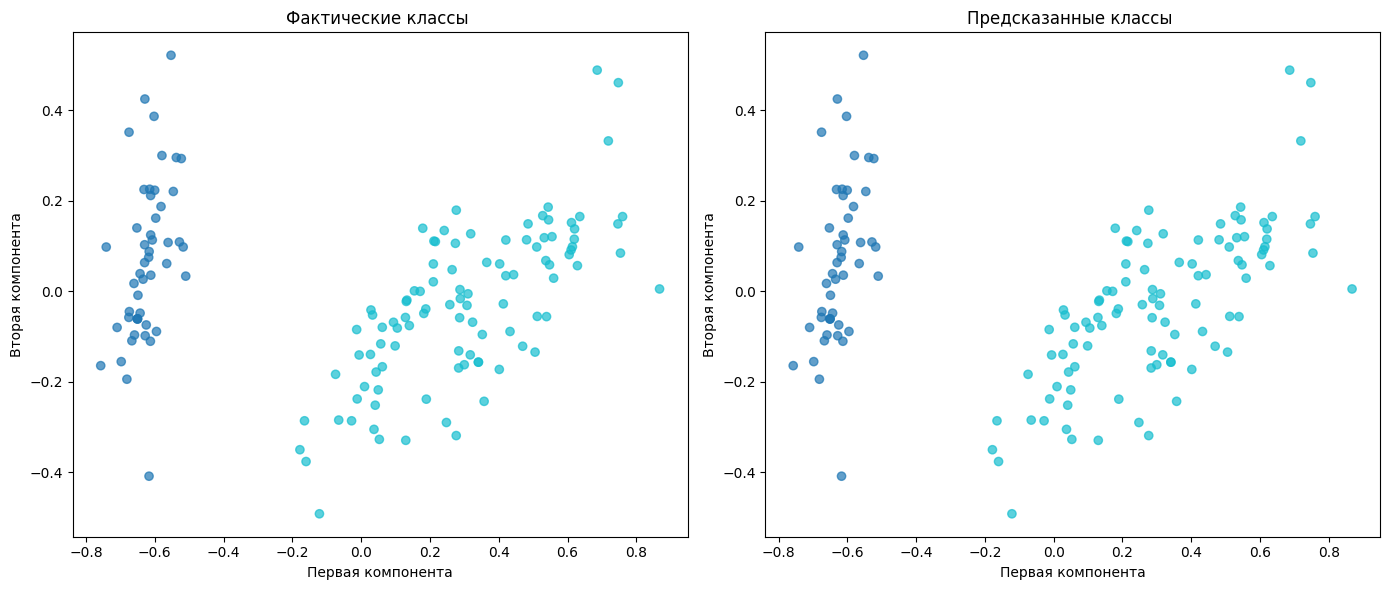

In [71]:
pca = PCA(n_components=2) # Снижаем размерность данных
X_2d = pca.fit_transform(X_norm)

predictions = svc_basic.predict(X_norm) # Получаем предсказания модели (используя обученную модель)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

scatter1 = ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=[hash(label) for label in y], cmap='tab10', alpha=0.7)
ax1.set_title('Фактические классы ')
ax1.set_xlabel('Первая компонента')
ax1.set_ylabel('Вторая компонента')

scatter2 = ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=[hash(label) for label in predictions], cmap='tab10', alpha=0.7)
ax2.set_title('Предсказанные классы ')
ax2.set_xlabel('Первая компонента')
ax2.set_ylabel('Вторая компонента')

plt.tight_layout()
plt.show()